   ### Task2  Prediction Using Unsupervised Machine Learning.


### Problem Statement:From the given iris dataset predict optimum number of clusters and represent it visually

#### Importing Neccessary Libraries

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Loading the data

In [2]:
iris = pd.read_csv('Iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Descriptive Statistics of Data

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
print(iris.shape)

print(iris.info())

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


#### Creating X

In [7]:
x = iris.iloc[:, [0, 1, 2, 3]].values

#### Frequency distribution of species

In [4]:
iris_outcome = pd.crosstab(index=iris["Species"],columns="count")    

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
iris_setosa=iris.loc[iris["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["Species"]=="Iris-versicolor"]

#### Distribution Plots

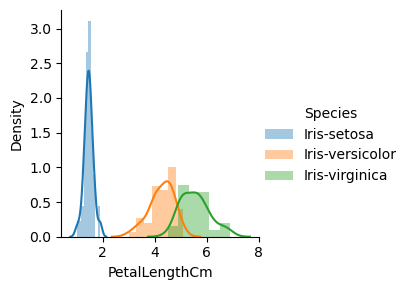

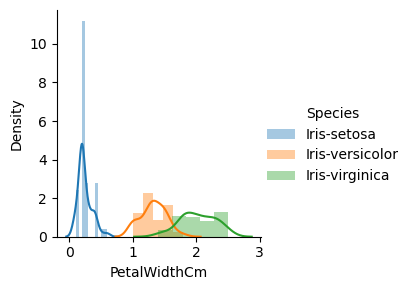

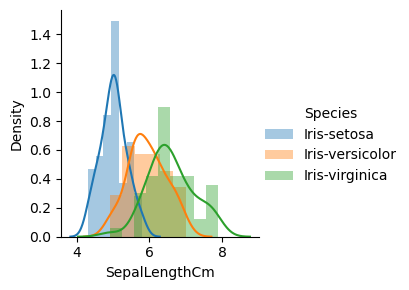

In [16]:
import seaborn as sns

# Visualizing the distribution of petal length by species
sns.FacetGrid(iris, hue="Species").map(sns.distplot, "PetalLengthCm").add_legend()

# Visualizing the distribution of petal width by species
sns.FacetGrid(iris, hue="Species").map(sns.distplot, "PetalWidthCm").add_legend()

# Visualizing the distribution of sepal length by species
sns.FacetGrid(iris, hue="Species").map(sns.distplot, "SepalLengthCm").add_legend()


#### Box Plot

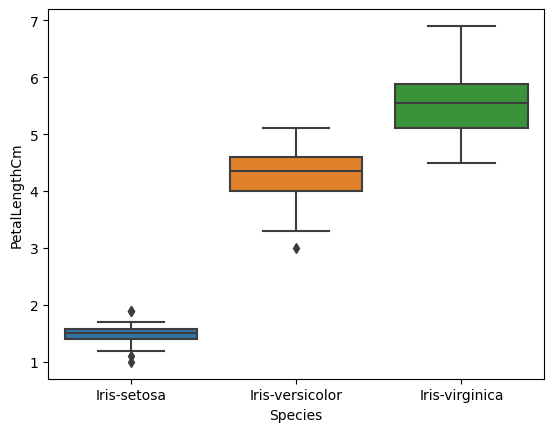

In [19]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

#### Violen Plot

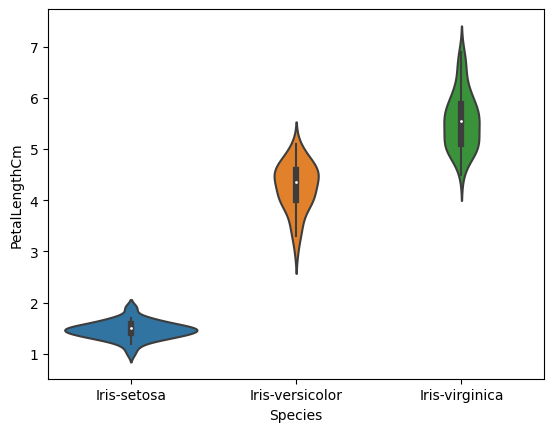

In [21]:
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

#### Scatter Plot

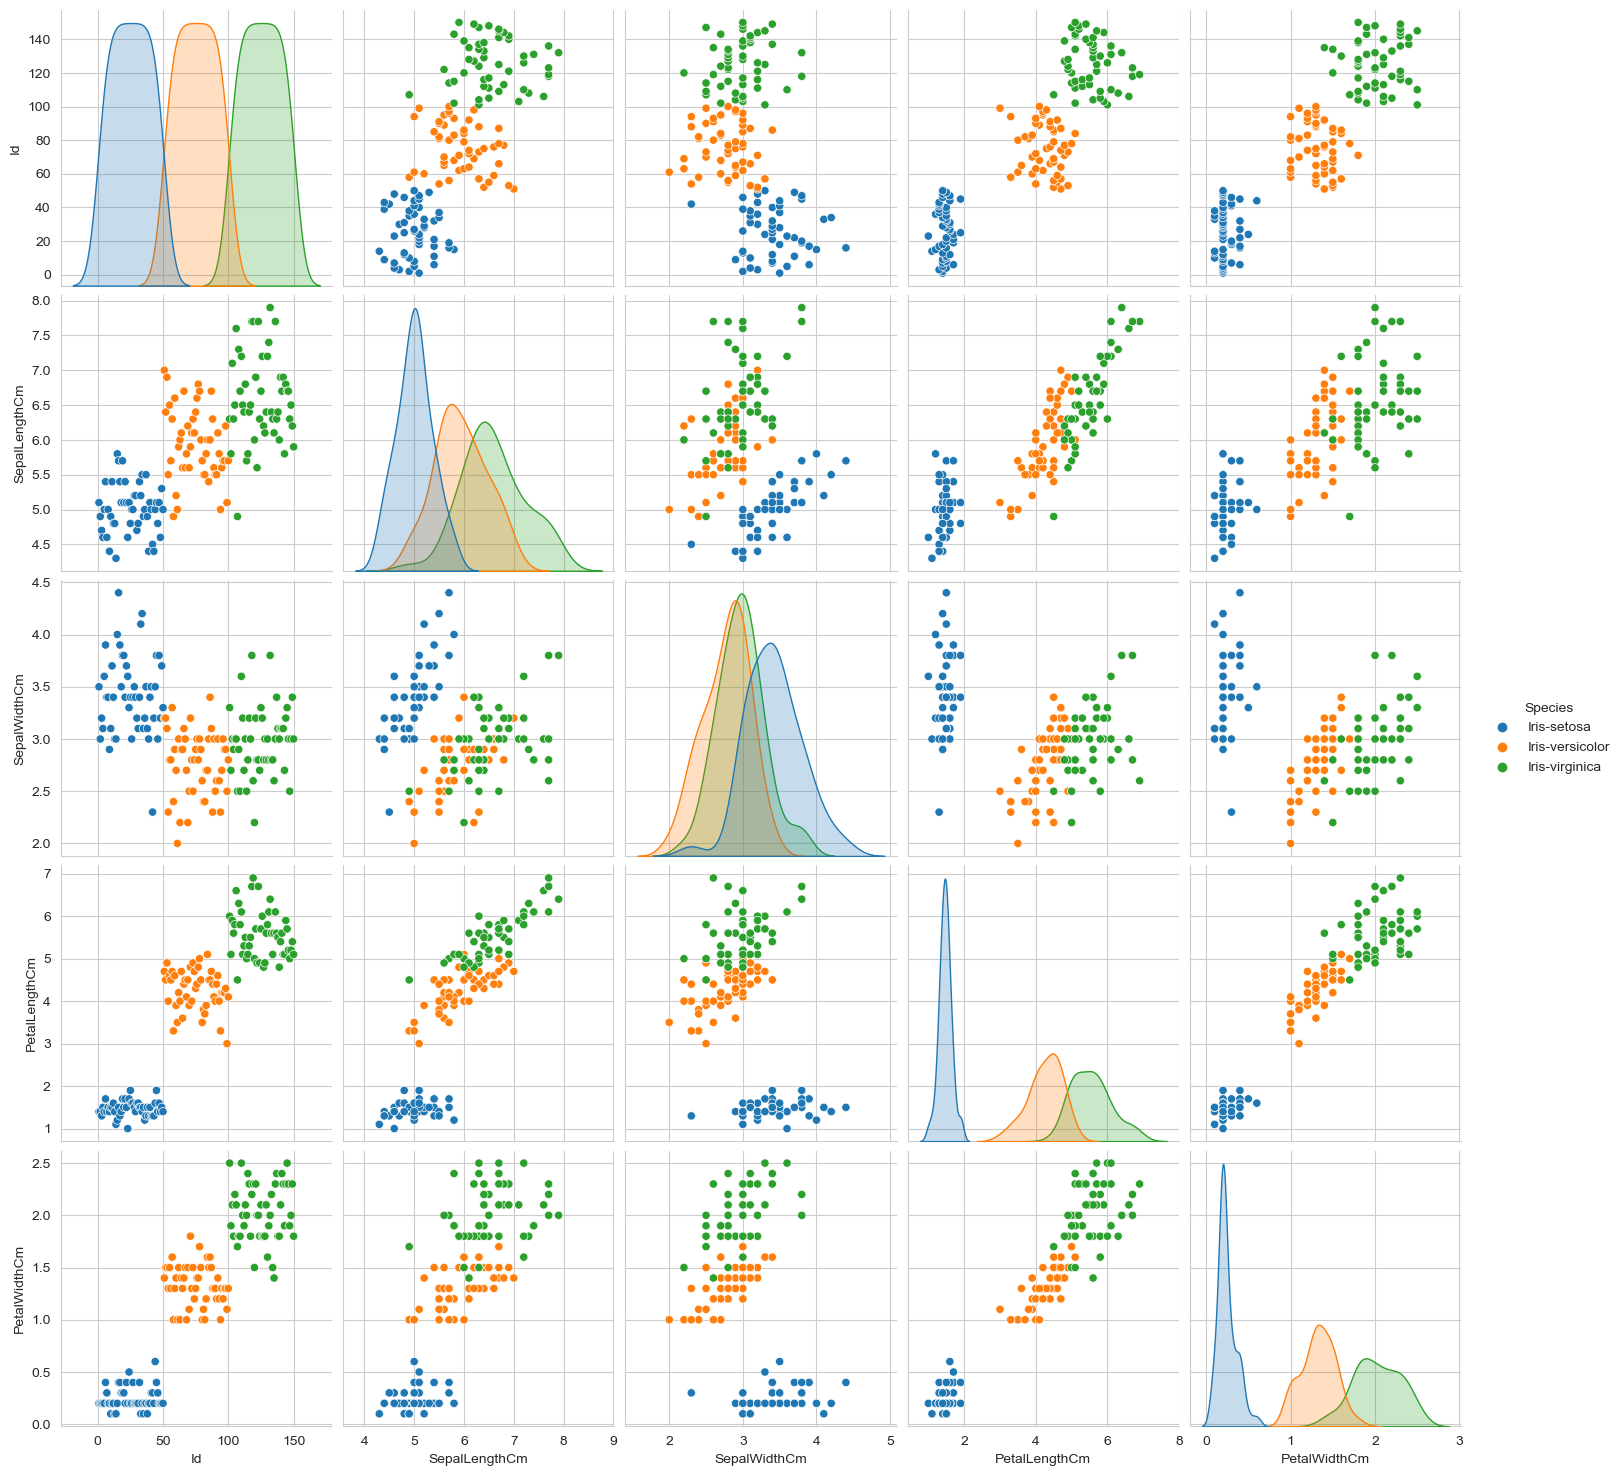

In [22]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="pecies",size=3);
plt.show()

### How to implement Kmeans Clustering

1.Select Number of Clusters (K):
Decide how many clusters you want to identify in your data.

2.Initial Centroid Selection:
Randomly pick K data points from your dataset as initial centroids, representing the centers of the clusters.

3.Assign Points to Nearest Centroid:
For each data point in your dataset, calculate the distance to each centroid.
Assign each data point to the cluster with the nearest centroid, forming K initial clusters.

4.Update Centroids:
Once all data points are assigned to clusters, recalculate the centroids of these clusters by taking the mean of the data points in each cluster.

5.Repeat Assignment and Update:
Iterate the process of assigning data points to clusters based on the nearest centroid and updating the centroids until convergence.
Convergence is achieved when the centroids no longer change significantly or after a predetermined number of iterations.

6.Evaluate Convergence:
Check for convergence by comparing the new centroids with the previous centroids. If they are the same or change less than a predefined threshold, stop iterating.

7.Finalize Clusters:
Once convergence is reached, the algorithm terminates, and the final centroids represent the centers of the clusters.
Each data point belongs to the cluster with the nearest centroid.


8.Analysis and Interpretation:
Analyze the resulting clusters and interpret their meaning in the context of your specific problem or dataset.
Implementing in Code:
Utilize libraries like scikit-learn in Python, which offers an efficient implementation of K-means.

#### Finding the optimum number of clusters for k-means classification

In [23]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

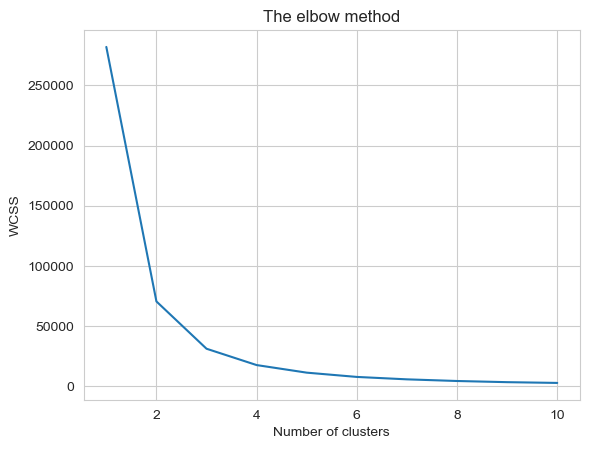

In [24]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### Implementing K-Means Clustering

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### Visualising the clusters

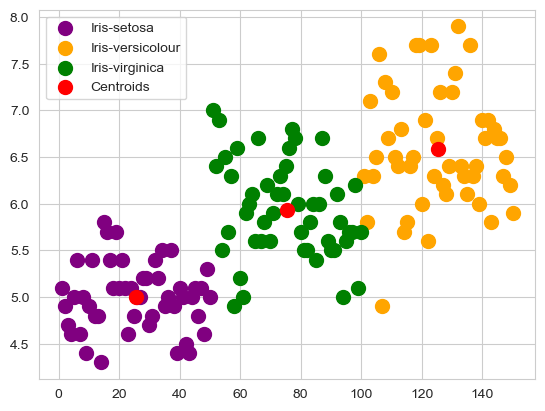

In [26]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

#### 3d scatterplot using matplotlib

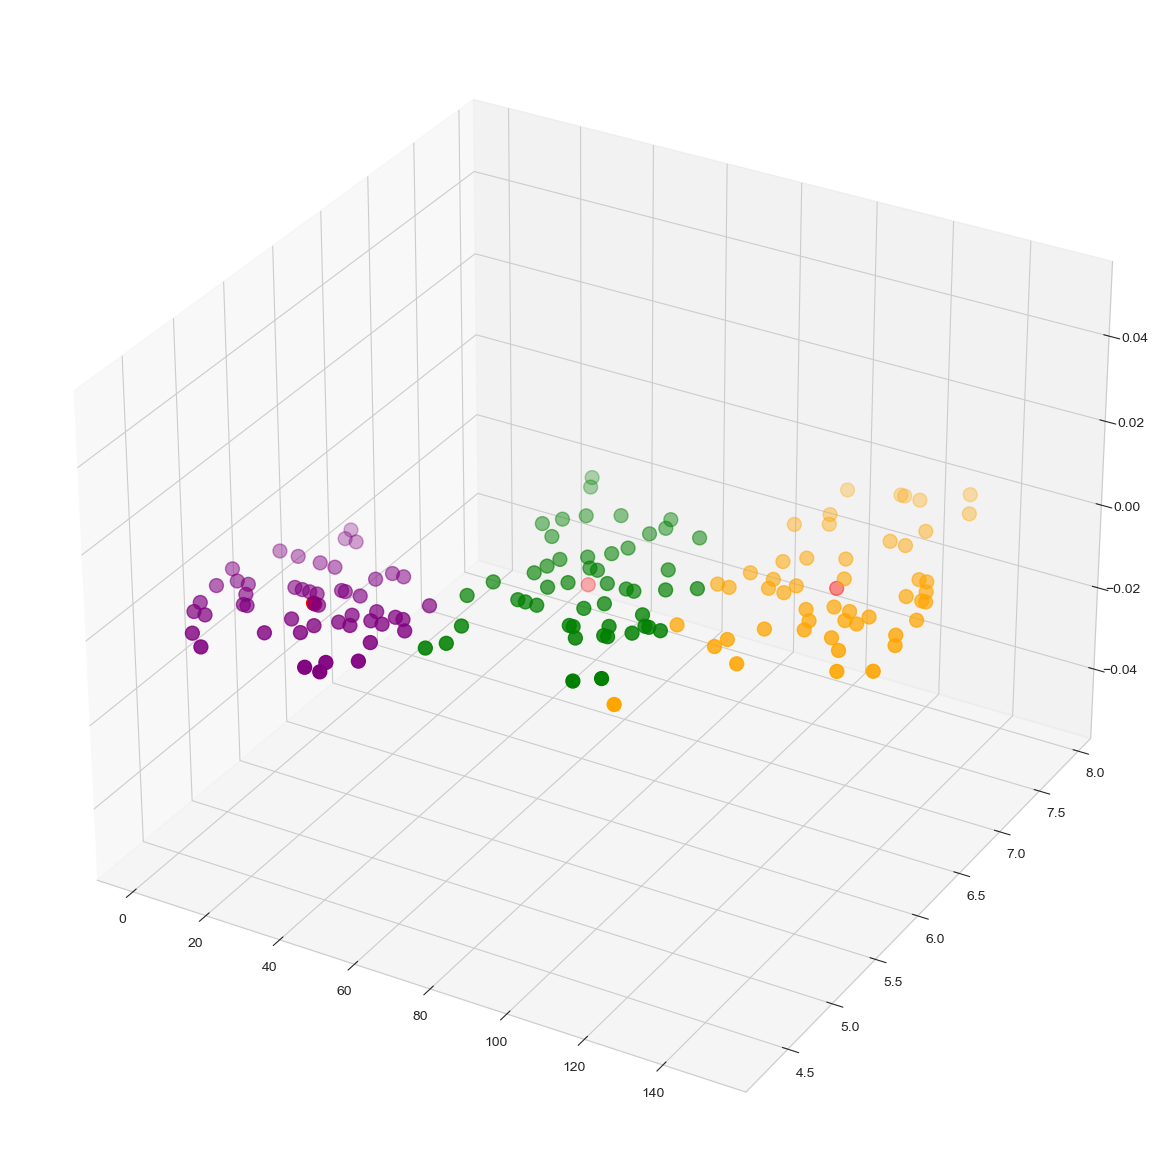

In [27]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()